In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
car_data = pd.read_csv('cars.csv')
X = car_data.drop(columns=['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Engine Type', 'Identification.Classification', 'Identification.ID', 'Identification.Model Year'])
y = car_data.iloc[:, 11].values

In [27]:
df = pd.DataFrame(car_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
Dimensions.Height                                  5076 non-null int64
Dimensions.Length                                  5076 non-null int64
Dimensions.Width                                   5076 non-null int64
Engine Information.Driveline                       5076 non-null object
Engine Information.Engine Type                     5076 non-null object
Engine Information.Hybrid                          5076 non-null bool
Engine Information.Number of Forward Gears         5076 non-null int64
Engine Information.Transmission                    5076 non-null object
Fuel Information.City mpg                          5076 non-null int64
Fuel Information.Fuel Type                         5076 non-null object
Fuel Information.Highway mpg                       5076 non-null int64
Identification.Classification                      5076 non-null object
Identification.ID                    

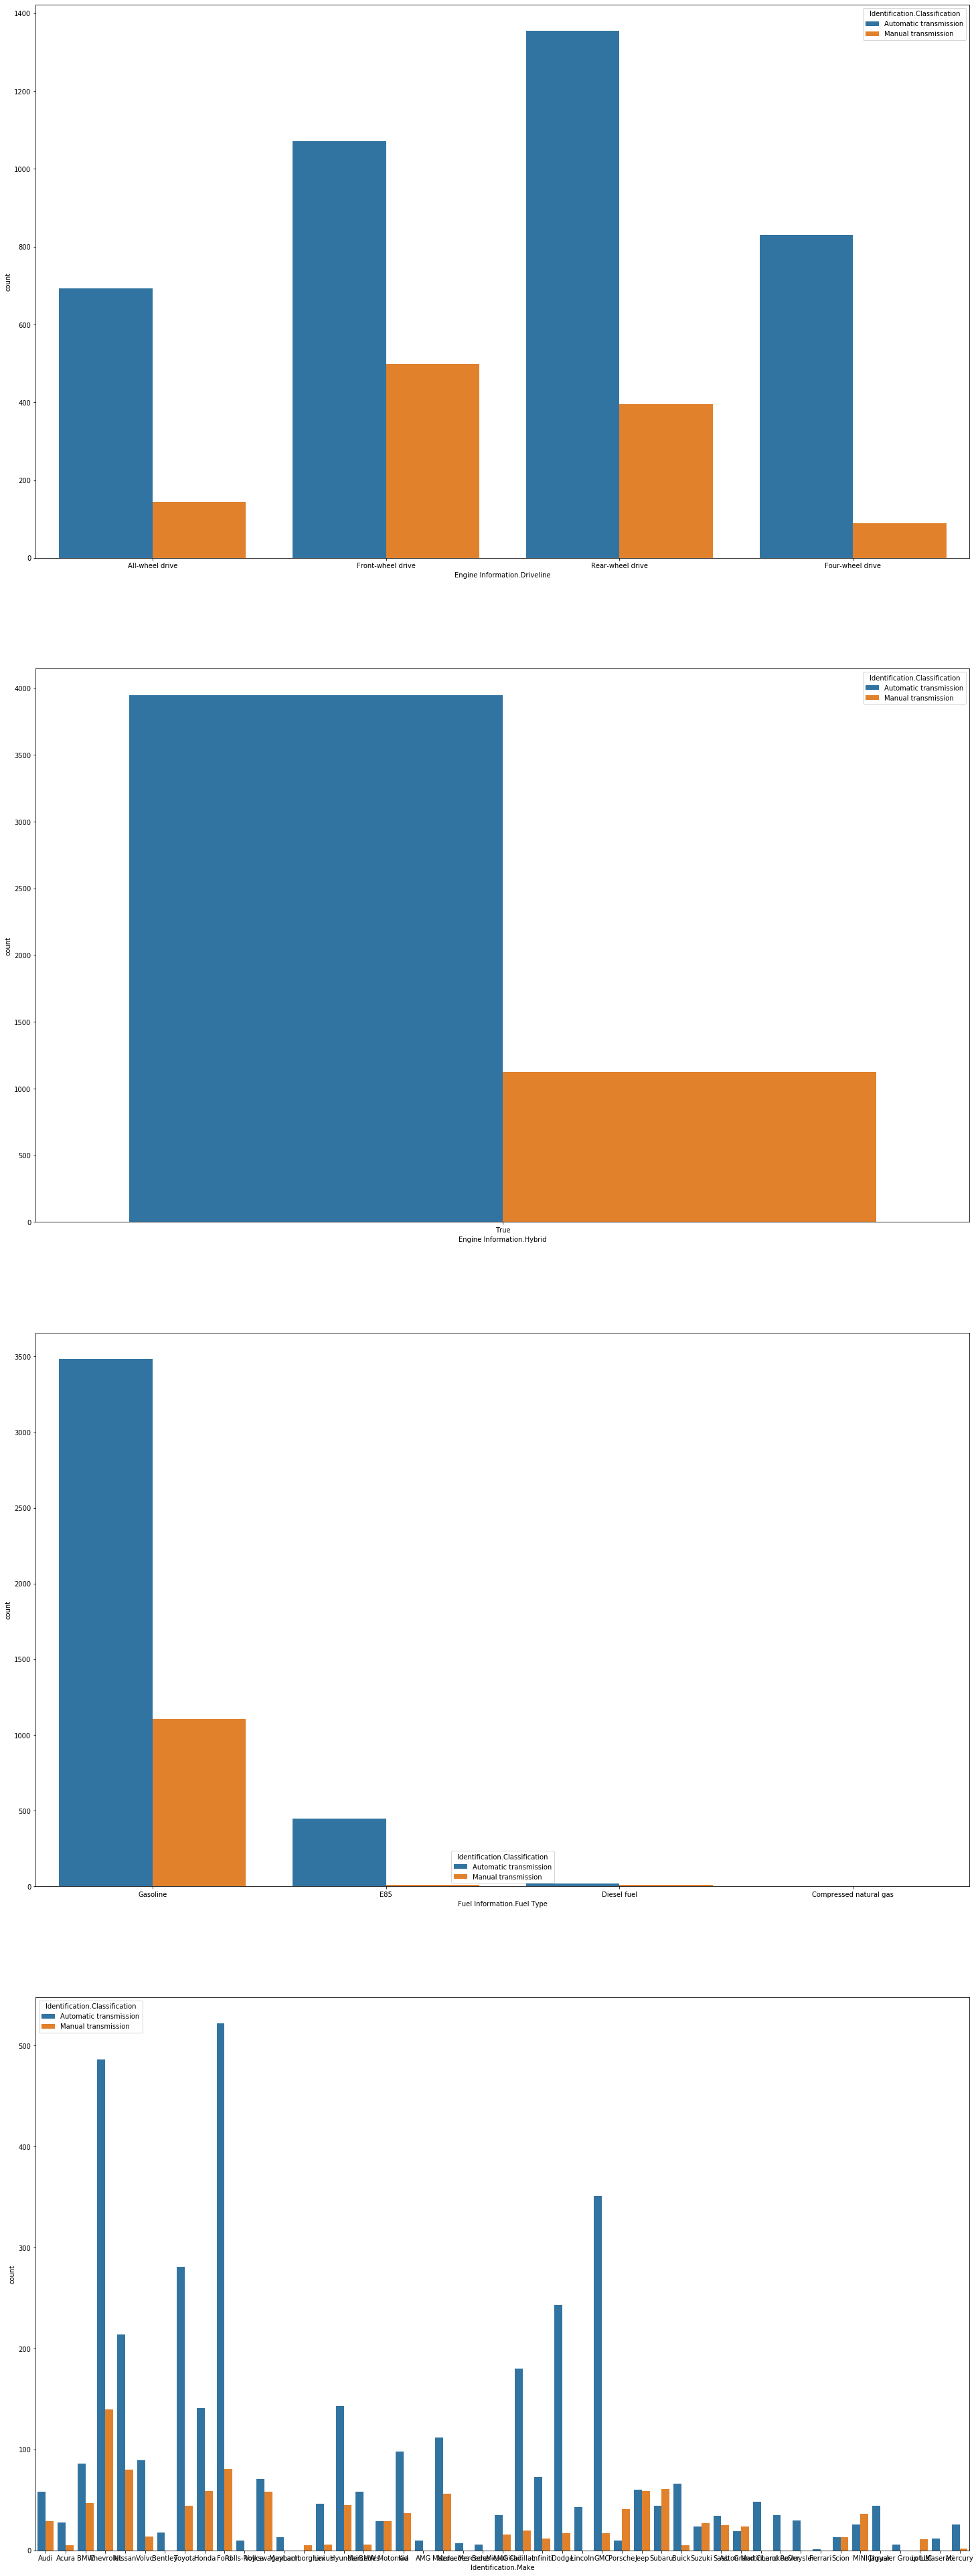

In [28]:
f, axes = plt.subplots(4, 1, figsize=[25, 70])

sns.countplot('Engine Information.Driveline', hue= 'Identification.Classification', data=car_data, ax=axes[0])
sns.countplot('Engine Information.Hybrid', hue= 'Identification.Classification', data=car_data, ax=axes[1])
sns.countplot('Fuel Information.Fuel Type', hue= 'Identification.Classification', data=car_data, ax=axes[2])
sns.countplot('Identification.Make', hue= 'Identification.Classification', data=car_data, ax=axes[3])

In [29]:
from sklearn.preprocessing import LabelEncoder
encode_A = LabelEncoder()
X['Fuel Information.Fuel Type'] = encode_A.fit_transform(X['Fuel Information.Fuel Type'])
X['Engine Information.Driveline'] = encode_A.fit_transform(X['Engine Information.Driveline'])
X['Identification.Make'] = encode_A.fit_transform(X['Identification.Make'])
X['Engine Information.Hybrid'] = encode_A.fit_transform(X['Engine Information.Hybrid'])
X['Engine Information.Transmission'] = encode_A.fit_transform(X['Engine Information.Transmission'])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
x_train

,Engine Information.Driveline,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
3202,2,0,6,5,18,3,25,40,2011,265,223
2575,0,0,4,1,21,3,27,42,2011,170,174
1414,3,0,6,6,18,3,27,8,2011,304,273
2214,3,0,4,0,14,3,20,15,2011,300,320
4843,2,0,5,3,21,3,30,46,2012,227,236
2617,0,0,4,1,19,3,24,42,2010,224,226
3355,1,0,5,2,13,3,18,12,2010,390,407
5036,2,0,6,7,15,2,23,40,2012,220,258
630,2,0,5,3,23,3,31,22,2010,173,168
3311,3,0,4,0,10,2,14,15,2011,302,305


In [32]:
x_test

,Engine Information.Driveline,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
159,2,0,5,4,22,3,31,17,2010,177,161
2102,0,0,6,7,18,3,25,38,2011,385,310
2969,1,0,4,0,15,3,19,21,2011,202,237
2453,3,0,6,7,19,3,26,38,2011,310,266
751,3,0,6,5,19,3,30,9,2011,312,278
1161,3,0,6,7,16,3,26,9,2011,430,424
491,2,0,5,2,19,3,27,44,2011,269,246
134,2,0,5,4,38,3,37,14,2011,120,112
302,0,0,8,10,19,3,28,3,2012,310,325
113,3,0,6,7,18,3,25,37,2010,332,270


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [36]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[['Manual transmission' 'Manual transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Manual transmission' 'Manual transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automatic transmission']
 ['Automatic transmission' 'Automat

In [37]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9990157480314961